#Importing Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

#Data Preprocessing

##Training Image preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/archive (5)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


##Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/archive (5)/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


#Building Model

In [5]:
cnn = tf.keras.models.Sequential()

##Building Convolution Layer

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [10]:
cnn.add(tf.keras.layers.Flatten())

In [11]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [12]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling and Training Phase

In [15]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                        

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 [==============================] - 60s 563ms/step - loss: 6.5459 - accuracy: 0.0305 - val_loss: 3.4874 - val_accuracy: 0.0342
Epoch 2/32
98/98 [==============================] - 23s 210ms/step - loss: 3.4572 - accuracy: 0.0494 - val_loss: 3.2076 - val_accuracy: 0.1652
Epoch 3/32
98/98 [==============================] - 20s 182ms/step - loss: 3.2196 - accuracy: 0.1072 - val_loss: 2.8631 - val_accuracy: 0.2251
Epoch 4/32
98/98 [==============================] - 18s 166ms/step - loss: 2.9907 - accuracy: 0.1470 - val_loss: 2.5897 - val_accuracy: 0.3533
Epoch 5/32
98/98 [==============================] - 17s 162ms/step - loss: 2.7605 - accuracy: 0.2016 - val_loss: 2.0967 - val_accuracy: 0.4986
Epoch 6/32
98/98 [==============================] - 17s 164ms/step - loss: 2.4780 - accuracy: 0.2806 - val_loss: 1.7414 - val_accuracy: 0.6211
Epoch 7/32
98/98 [==============================] - 17s 161ms/step - loss: 2.2040 - accuracy: 0.3522 - val_loss: 1.3270 - val_accuracy: 0.7265

##Evaluating Model

In [18]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 [==============================] - 13s 115ms/step - loss: 0.0499 - accuracy: 0.9865
Training accuracy: 0.9865168333053589


In [19]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 [==============================] - 2s 56ms/step - loss: 0.2818 - accuracy: 0.9601
Validation accuracy: 0.9601139426231384


##Saving Model

In [20]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
training_history.history #Return Dictionary of history

{'loss': [6.545876979827881,
  3.457158327102661,
  3.2196052074432373,
  2.990691661834717,
  2.7605488300323486,
  2.478036880493164,
  2.204007387161255,
  1.9241604804992676,
  1.6524631977081299,
  1.4466921091079712,
  1.2116880416870117,
  1.0274486541748047,
  0.9626687169075012,
  0.7713389992713928,
  0.7989908456802368,
  0.691066563129425,
  0.6223991513252258,
  0.583232581615448,
  0.49905961751937866,
  0.5433283448219299,
  0.422774076461792,
  0.4146418869495392,
  0.34873896837234497,
  0.3433630168437958,
  0.3432970643043518,
  0.29622146487236023,
  0.2988044023513794,
  0.29707950353622437,
  0.3013135492801666,
  0.24683737754821777,
  0.25664928555488586,
  0.2246955931186676],
 'accuracy': [0.030497591942548752,
  0.049438200891017914,
  0.10722311586141586,
  0.14703050255775452,
  0.20160514116287231,
  0.2805778384208679,
  0.35216692090034485,
  0.43627607822418213,
  0.508507251739502,
  0.5826645493507385,
  0.6343499422073364,
  0.6821829676628113,
  0.7

In [22]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [23]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##Calculating Accuracy of Model Achieved on Validation set

In [24]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 96.01139426231384 %


#Accuracy Visualization

##Training Visualization

In [25]:
#training_history.history['accuracy']

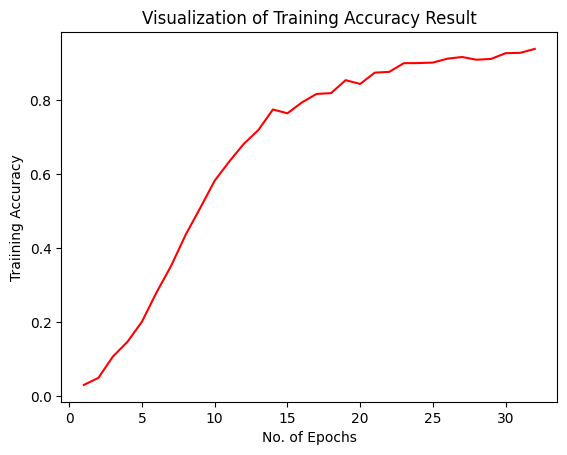

In [26]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

##Validation Accuracy

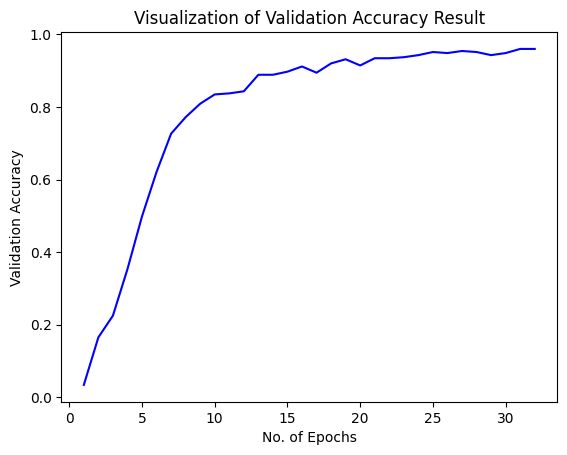

In [27]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

##Test set Evaluation

In [28]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/archive (5)/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [29]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 [==============================] - 4s 25ms/step - loss: 0.2756 - accuracy: 0.9610
Test accuracy: 0.961002767086029
